## Importar librerías e inicializar variables

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
############# HTRU_2 Dataset #########
names_HTRU = [
	'Mean_i_p',
	'Standard_deviation_i_p',
	'Excess_kurtosis_i_p',
	'Skewness_i_p',
	'Mean_DM-SNR_curve',
	'Standard_deviation_DM-SNR_curve',
	'Excess_kurtosis_DM-SNR_curve',
	'Skewness_DM-SNR_curve', 
	'Class'
]

data_HTRU = pd.read_csv("../Datasets/HTRU_2.csv", delimiter = ",", decimal = ".", names=names_HTRU)

rf_model1_HTRU = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=9, max_features=5)
rf_model2_HTRU = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, max_features=3)
rf_model3_HTRU = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=15, max_features=3)
rf_model4_HTRU = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=5, max_features=8)

## Pre-procesado de datos

In [4]:
############# HTRU_2 Dataset #########
target_HTRU = data_HTRU['Class']
train_HTRU = data_HTRU.drop('Class', axis=1)

X_train_HTRU, X_test_HTRU, y_train_HTRU, y_test_HTRU = train_test_split(train_HTRU, target_HTRU, random_state=0, test_size=.2)


## Feature Engineering

#### 1. Selección de featureset con una máxima profundidad de 9 para los árboles y 5 features por árbol

In [116]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(rf_model1_HTRU, threshold=0.025)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (14318, 8)
Número de features seleccionados para HTRU:  (14318, 4)


Text(0.5,0,'Features HTRU')

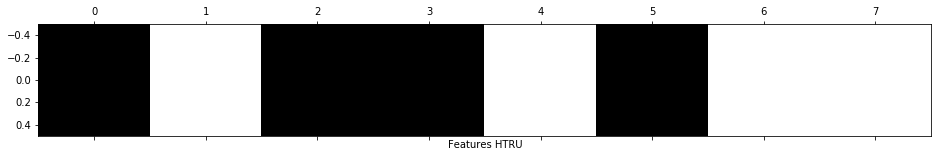

In [117]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [5]:
#f_rf_HTRU = pd.DataFrame(np.asarray(train_HTRU)[:,select_HTRU.get_support()])
#f_rf_HTRU.to_csv('features_rf_HTRU.csv', header=None, index=None)

In [118]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 2, 3, 5])

#### 2. Selección de featureset con máxima profundidad de 15 para los árboles y 3 features por árbol

In [119]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(rf_model2_HTRU, threshold=0.05)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (14318, 8)
Número de features seleccionados para HTRU:  (14318, 4)


Text(0.5,0,'Features HTRU')

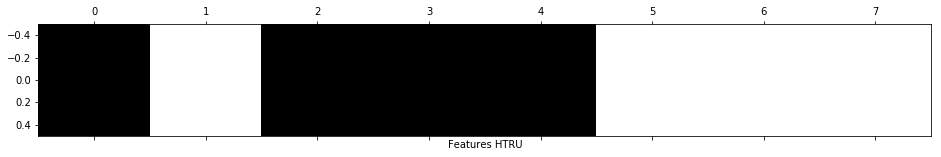

In [120]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [121]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 2, 3, 4])

#### 3. Selección con menos árboles

In [122]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(rf_model3_HTRU, threshold=0.0285)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (14318, 8)
Número de features seleccionados para HTRU:  (14318, 5)


Text(0.5,0,'Features HTRU')

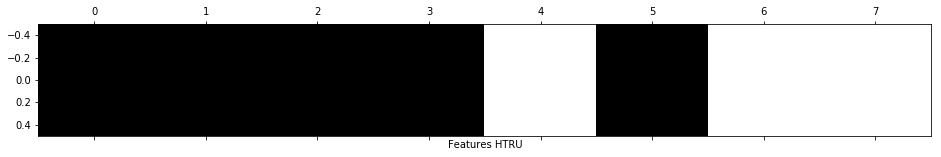

In [123]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [124]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 1, 2, 3, 5])

#### 4. Selección con menos árboles y todos los features por cada árbol

In [125]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(rf_model4_HTRU, threshold=0.01)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (14318, 8)
Número de features seleccionados para HTRU:  (14318, 3)


Text(0.5,0,'Features HTRU')

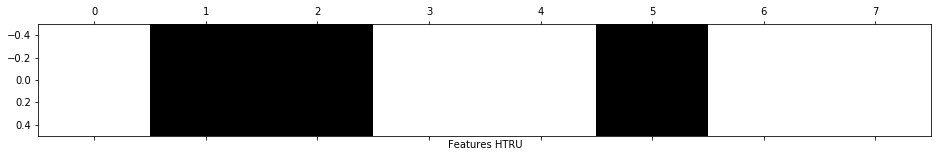

In [126]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [127]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([1, 2, 5])